# Milestone II: OECD Indicators

### Data Sources

The OECD HCQI data collection includes a total of 64 indicators across several healthcare themes and reports data from 40 countries. This dataset can be useful to describe the state of healthcare systems in any given county. In addition, the OECD provides various supplementary datasets describing Health Status, Non-Medical Determinants of Health, Social Protection, and demographics / macro-economics of member nations.

https://www.oecd.org/health/health-systems/health-care-quality-outcomes-indicators.htm


### Imports

In [309]:
# Data Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data Preparation

OECD Datasets

In [310]:
# Load

# OECD HCQI // Healthcare Quality Indicators
hcqi = pd.read_csv("OECD/HEALTH_HCQI_22092023205825625.csv")

# OECD LVNG // Non-Medical Determinants of Health
lvng = pd.read_csv("OECD/HEALTH_LVNG_25092023023230295.csv")

# OECD STAT // Health Statistics
stat = pd.read_csv("OECD/HEALTH_STAT_25092023023520080.csv")

# OECD PROT // Social Protection
prot = pd.read_csv("OECD/HEALTH_PROT_22092023205920251.csv")

# OECD DEMR // Demographics
demr = pd.read_csv("OECD/HEALTH_DEMR_25092023023656863.csv")

# OECD ECOR // Economic References
ecor = pd.read_csv("OECD/HEALTH_ECOR_28092023052908229.csv")

oecd_datasets = [hcqi, lvng, stat, prot, demr, ecor]

In [311]:
# Examine

hcqi.head()

,COU,Country,PER,Periods,IND,Indicator,GEN,Gender,AGE,Age Group,VAL,Value,Value.1,Flag Codes,Flags
0,AUS,Australia,TIME11,2011,ADMRASTH,Asthma hospital admission,M,Male,TOTAL_15,15 years old and over,AS_STD_RATE_MPOP,Age-sex standardised rate per 100 000 population,40.4,NaN,NaN
1,AUS,Australia,TIME11,2011,ADMRASTH,Asthma hospital admission,M,Male,TOTAL_15,15 years old and over,LOW_CI,Lower confidence interval,39.1,NaN,NaN
2,AUS,Australia,TIME11,2011,ADMRASTH,Asthma hospital admission,M,Male,TOTAL_15,15 years old and over,UP_CI,Upper confidence interval,41.8,NaN,NaN
3,AUS,Australia,TIME12,2012,ADMRASTH,Asthma hospital admission,M,Male,TOTAL_15,15 years old and over,AS_STD_RATE_MPOP,Age-sex standardised rate per 100 000 population,36.8,NaN,NaN
4,AUS,Australia,TIME12,2012,ADMRASTH,Asthma hospital admission,M,Male,TOTAL_15,15 years old and over,LOW_CI,Lower confidence interval,35.5,NaN,NaN


In [312]:
ecor.head()

,VAR,Variable,UNIT,Measure,COU,Country,YEA,Year,Value,Flag Codes,Flags
0,ECONPIBN,Gross domestic product (GDP),INDICEIP,Price index (2015=100),AUS,Australia,2010,2010,98.2,NaN,NaN
1,ECONPIBN,Gross domestic product (GDP),INDICEIP,Price index (2015=100),AUS,Australia,2011,2011,99.9,NaN,NaN
2,ECONPIBN,Gross domestic product (GDP),INDICEIP,Price index (2015=100),AUS,Australia,2012,2012,99.8,NaN,NaN
3,ECONPIBN,Gross domestic product (GDP),INDICEIP,Price index (2015=100),AUS,Australia,2013,2013,101.2,NaN,NaN
4,ECONPIBN,Gross domestic product (GDP),INDICEIP,Price index (2015=100),AUS,Australia,2014,2014,100.6,NaN,NaN


In [313]:
# Preliminary Cleaning
# Note: More research into flag codes is needed


def clean_oecd_df(df):
    """Removes redundant or unneeded columns from OECD datasets"""

    df.drop(["Flag Codes", "Flags"], axis=1, inplace=True)
    if "YEA" in df.columns:
        df.drop(["YEA"], axis=1, inplace=True)
    else:
        df.drop(["PER"], axis=1, inplace=True)

    return df


oecd_datasets = [clean_oecd_df(x) for x in oecd_datasets]

# Renaming columns in HCQI to match other datasets
hcqi.rename(
    columns={"Indicator": "Variable", "IND": "VAR", "Periods": "Year"}, inplace=True
)

hcqi.head()

,COU,Country,Year,VAR,Variable,GEN,Gender,AGE,Age Group,VAL,Value,Value.1
0,AUS,Australia,2011,ADMRASTH,Asthma hospital admission,M,Male,TOTAL_15,15 years old and over,AS_STD_RATE_MPOP,Age-sex standardised rate per 100 000 population,40.4
1,AUS,Australia,2011,ADMRASTH,Asthma hospital admission,M,Male,TOTAL_15,15 years old and over,LOW_CI,Lower confidence interval,39.1
2,AUS,Australia,2011,ADMRASTH,Asthma hospital admission,M,Male,TOTAL_15,15 years old and over,UP_CI,Upper confidence interval,41.8
3,AUS,Australia,2012,ADMRASTH,Asthma hospital admission,M,Male,TOTAL_15,15 years old and over,AS_STD_RATE_MPOP,Age-sex standardised rate per 100 000 population,36.8
4,AUS,Australia,2012,ADMRASTH,Asthma hospital admission,M,Male,TOTAL_15,15 years old and over,LOW_CI,Lower confidence interval,35.5


In [314]:
# Helper functions for data visualization


def get_timeseries(df, country_codes, indicator_codes, year=None):
    """Get a timeseries for a list of countries and the specified indicators"""

    # Perform filtering
    df = df[df["VAR"].isin(indicator_codes)]

    if country_codes:
        df = df[df["COU"].isin(country_codes)]

    # Drop unneeded columns

    # Filter data to specified year
    if year:
        df = df[df["Year"] == year]  # .drop('year', axis=1)

    df = df[df["Value"] != 0]  # Drop if no data / 0 for rate or measure
    if "Value.1" in df:
        df = df.sort_values(by="Value.1")
    else:
        df = df.sort_values(by="Value")

    return df

In [315]:
get_timeseries(ecor, country_codes=None, indicator_codes=["ECONPIBN"])

,VAR,Variable,UNIT,Measure,COU,Country,Year,Value
9483,ECONPIBN,Gross domestic product (GDP),INDICEIP,Price index (2015=100),ARG,Argentina,2010,3.000000e+01
9484,ECONPIBN,Gross domestic product (GDP),INDICEIP,Price index (2015=100),ARG,Argentina,2011,3.710000e+01
9485,ECONPIBN,Gross domestic product (GDP),INDICEIP,Price index (2015=100),ARG,Argentina,2012,4.540000e+01
9486,ECONPIBN,Gross domestic product (GDP),INDICEIP,Price index (2015=100),ARG,Argentina,2013,5.630000e+01
475,ECONPIBN,Gross domestic product (GDP),INDICEIP,Price index (2015=100),RUS,Russia,2010,6.520000e+01
...,...,...,...,...,...,...,...,...
4525,ECONPIBN,Gross domestic product (GDP),VALRELMT,Million NCU at 2015 GDP price level,IDN,Indonesia,2022,1.502674e+10
976,ECONPIBN,Gross domestic product (GDP),MLLNCUMT,Million of national currency units,IDN,Indonesia,2020,1.544335e+10
975,ECONPIBN,Gross domestic product (GDP),MLLNCUMT,Million of national currency units,IDN,Indonesia,2019,1.583266e+10
977,ECONPIBN,Gross domestic product (GDP),MLLNCUMT,Million of national currency units,IDN,Indonesia,2021,1.697669e+10


### EDA: Investigating the Maternal Mortality Gap

Our project intends to provide a detailed look into the factors that contribute to maternal mortality across the world, including health and societal indicators, but with a focus on understanding the US’s relatively high maternal mortality rate compared to other developed nations. First, we will visually explore the gap between the maternal healthcare of the US and other nations, to both demonstrate the significance of the problem and investigate possible factors for further exploration.

In [316]:
# List of Mid to High income economies in the OECD by GDP per Capita (US$ PPP, 2019)
# Using a cutoff of $35,000 GDP per Capita PPP

df = get_timeseries(ecor, country_codes=None, indicator_codes=["ECONPIBN"])
df = df[df["Measure"] == "/capita, US$ purchasing power parity"]

df = df[df["Year"] == 2019]
top_econ = list(df[df["Value"] > 35000]["COU"].unique())

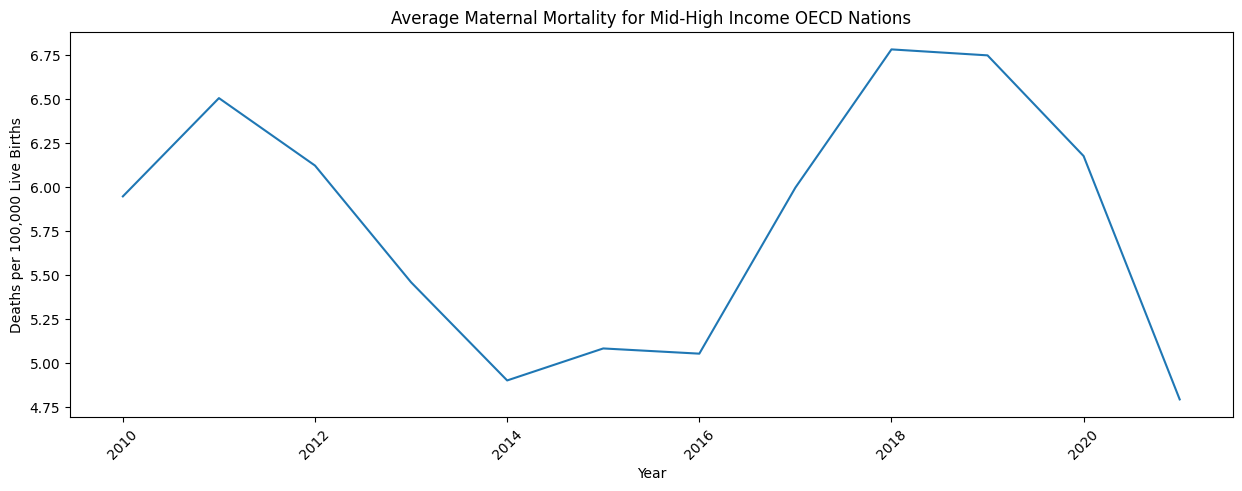

In [317]:
# Trends in MM rate over time among developed OECD nations

# Average Maternal Mortality rate of OECD nations over time
df = get_timeseries(stat, country_codes=top_econ, indicator_codes=["MATIMATM"])[
    ["Value", "Country", "Year"]
]
df = df.groupby("Year").mean(numeric_only=True)

# Visualization of Maternal Mortality Gap
df.plot.line(
    ylabel="Deaths per 100,000 Live Births",
    title="Average Maternal Mortality for Mid-High Income OECD Nations",
    legend=None,
    figsize=(15, 5),
)

plt.xticks(rotation=45)
plt.show()

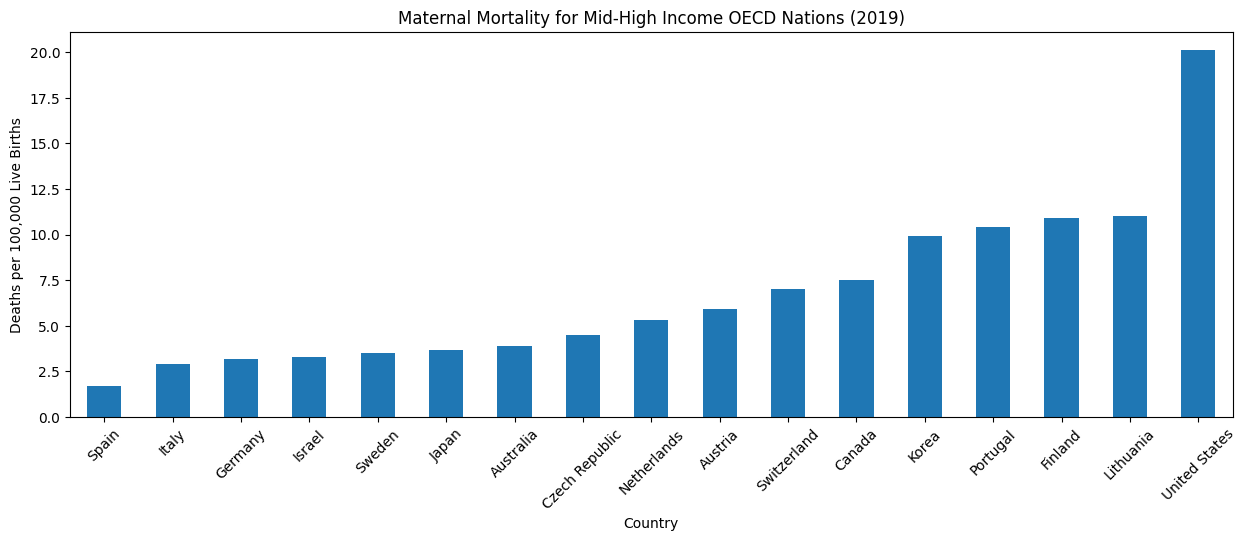

In [318]:
# Maternal Mortality of developed OECD nations compared, for 2019 data
df = get_timeseries(
    stat, country_codes=list(top_econ), indicator_codes=["MATIMATM"], year=2019
)[["Value", "Country"]]

# Visualization of Maternal Mortality Gap
df.plot.bar(
    x="Country",
    xlabel="Country",
    ylabel="Deaths per 100,000 Live Births",
    title="Maternal Mortality for Mid-High Income OECD Nations (2019)",
    legend=None,
    figsize=(15, 5),
)

plt.xticks(rotation=45)
plt.show()

As we can see, among the developed nations for which 2019 data on maternal mortality exists, the US sits at the highest spot with nearly double the rate of the next highest, Lithuania. Next, it will be instructive for us to compare maternal mortality with infant mortality to see if a similar gap exists and what correlations could exist.

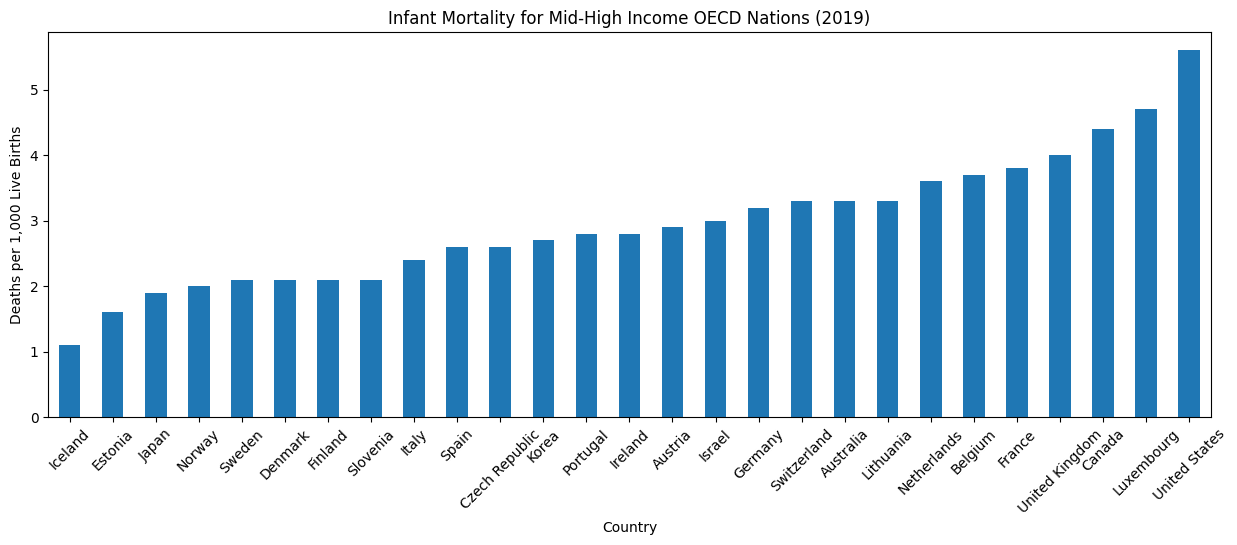

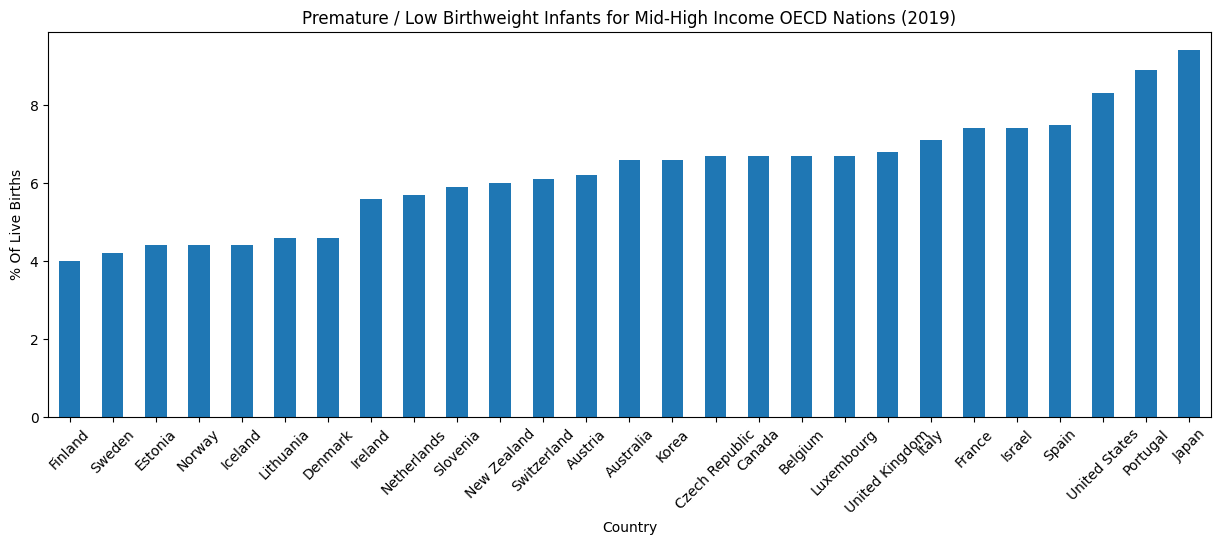

In [319]:
# Infant Mortality of developed OECD nations compared, for 2019 data
df = get_timeseries(
    stat, country_codes=list(top_econ), indicator_codes=["MATIINFA"], year=2019
)[["Value", "Country"]]

# Visualization of Maternal Mortality Gap
df.plot.bar(
    x="Country",
    xlabel="Country",
    ylabel="Deaths per 1,000 Live Births",
    title="Infant Mortality for Mid-High Income OECD Nations (2019)",
    legend=None,
    figsize=(15, 5),
)

plt.xticks(rotation=45)
plt.show()

# Infant Mortality of developed OECD nations compared, for 2019 data
df = get_timeseries(
    stat, country_codes=list(top_econ), indicator_codes=["INFAPREM"], year=2019
)[["Value", "Country"]]

# Visualization of Maternal Mortality Gap
df.plot.bar(
    x="Country",
    xlabel="Country",
    ylabel="% Of Live Births",
    title="Premature / Low Birthweight Infants for Mid-High Income OECD Nations (2019)",
    legend=None,
    figsize=(15, 5),
)

plt.xticks(rotation=45)
plt.show()

One probable reason for this MM gap could be due to differences in insurance coverage among developed nations. In the next chart, we compare the OECD nations' total insurance coverage of the population.

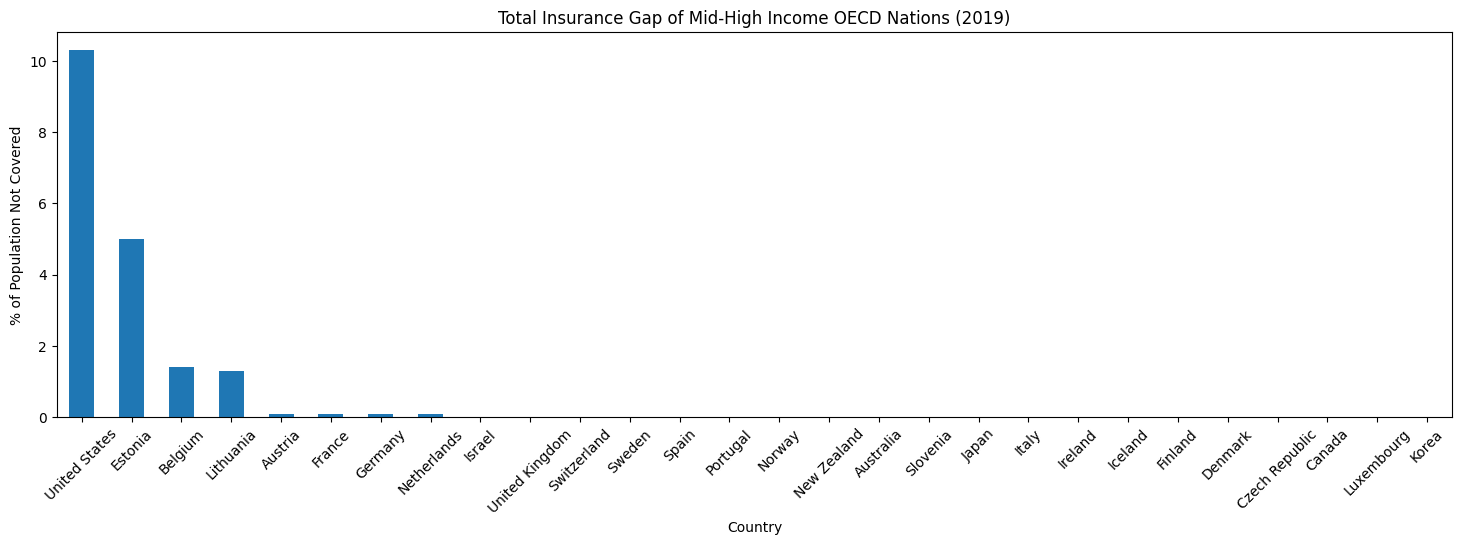

In [320]:
# Total Public and Primary Health Insurance coverage of OECD nations compared, for 2019 data
df = get_timeseries(
    prot, country_codes=list(top_econ), indicator_codes=["TPRIBASI"], year=2019
)[["Value", "Country"]]
df["Value"] = 100 - df["Value"]

# Visualization of Population Covered by Insurance
df.plot.bar(
    x="Country",
    xlabel="Country",
    ylabel="% of Population Not Covered",
    title="Total Insurance Gap of Mid-High Income OECD Nations (2019)",
    legend=None,
    figsize=(18, 5),
)

plt.xticks(rotation=45)
plt.show()

As we can see, most developed nations have a 100% insurance coverage rate of the population, with the US having the highest amount of uninsured persons.

### Data Cleaning and Transformation

In [321]:
# HCQI has a unique format compared to the other datasets
hcqi.head()

,COU,Country,Year,VAR,Variable,GEN,Gender,AGE,Age Group,VAL,Value,Value.1
0,AUS,Australia,2011,ADMRASTH,Asthma hospital admission,M,Male,TOTAL_15,15 years old and over,AS_STD_RATE_MPOP,Age-sex standardised rate per 100 000 population,40.4
1,AUS,Australia,2011,ADMRASTH,Asthma hospital admission,M,Male,TOTAL_15,15 years old and over,LOW_CI,Lower confidence interval,39.1
2,AUS,Australia,2011,ADMRASTH,Asthma hospital admission,M,Male,TOTAL_15,15 years old and over,UP_CI,Upper confidence interval,41.8
3,AUS,Australia,2012,ADMRASTH,Asthma hospital admission,M,Male,TOTAL_15,15 years old and over,AS_STD_RATE_MPOP,Age-sex standardised rate per 100 000 population,36.8
4,AUS,Australia,2012,ADMRASTH,Asthma hospital admission,M,Male,TOTAL_15,15 years old and over,LOW_CI,Lower confidence interval,35.5


In [322]:
# Reformatting HCQI data for merging

# Rename indicators with more info and then drop unnecessary columns
hcqi['VAR'] = hcqi['VAR'] + '_' + hcqi['GEN'] + '_' + hcqi['AGE'] + '_' + hcqi['VAL']
hcqi.drop(['Country', 'Variable', 'GEN', 'Gender', 'AGE', 'Age Group', 'VAL', 'Value'], axis=1, inplace=True)
hcqi.rename(columns={'Value.1': 'Value'}, inplace=True)

hcqi.head()

,COU,Year,VAR,Value
0,AUS,2011,ADMRASTH_M_TOTAL_15_AS_STD_RATE_MPOP,40.4
1,AUS,2011,ADMRASTH_M_TOTAL_15_LOW_CI,39.1
2,AUS,2011,ADMRASTH_M_TOTAL_15_UP_CI,41.8
3,AUS,2012,ADMRASTH_M_TOTAL_15_AS_STD_RATE_MPOP,36.8
4,AUS,2012,ADMRASTH_M_TOTAL_15_LOW_CI,35.5


In [323]:
# Merging of OECD datasets

HEALTH_MERGED = pd.concat(oecd_datasets[:])
HEALTH_MERGED = HEALTH_MERGED[['VAR', 'COU', 'Year', 'Value']]
HEALTH_MERGED.rename(columns={'COU': 'Country'}, inplace=True)

HEALTH_MERGED.head()

,VAR,Country,Year,Value
0,ADMRASTH_M_TOTAL_15_AS_STD_RATE_MPOP,AUS,2011,40.4
1,ADMRASTH_M_TOTAL_15_LOW_CI,AUS,2011,39.1
2,ADMRASTH_M_TOTAL_15_UP_CI,AUS,2011,41.8
3,ADMRASTH_M_TOTAL_15_AS_STD_RATE_MPOP,AUS,2012,36.8
4,ADMRASTH_M_TOTAL_15_LOW_CI,AUS,2012,35.5


In [324]:
# Transforming data into wide format

HEALTH_MERGED = pd.pivot_table(HEALTH_MERGED, index=['Country', 'Year'], columns='VAR', values='Value').reset_index().rename_axis(None, axis=1)

HEALTH_MERGED.head()

,Country,Year,ACOLALCT,ADMDEALL_F_TOTAL_CRUDE_RATE_MORT,ADMDEALL_M_TOTAL_CRUDE_RATE_MORT,ADMDEALL_T_TOTAL_CRUDE_RATE_MORT,ADMDEALZ_F_TOTAL_CRUDE_RATE_MORT,ADMDEALZ_M_TOTAL_CRUDE_RATE_MORT,ADMDEALZ_T_TOTAL_CRUDE_RATE_MORT,ADMDECAN_F_TOTAL_CRUDE_RATE_MORT,...,SRHSTGHB,SRHSTGHC,SRHSTGHD,SRHSTGHE,STRUPP80,STRUSFPL,TOBATBCT,TPRIBASI,VAPEVAPA,VAPEVAPY
0,ARG,2010,8.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,501.375,2074.125,28.433333,NaN,NaN,NaN
1,ARG,2011,7.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,513.025,2116.825,NaN,NaN,NaN,NaN
2,ARG,2012,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,524.475,2163.300,NaN,NaN,NaN,NaN
3,ARG,2013,8.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,535.825,2213.025,NaN,NaN,NaN,NaN
4,ARG,2014,7.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,547.200,2265.425,NaN,NaN,NaN,NaN


In [325]:
# Output for further preparation and use

HEALTH_MERGED.to_csv('HEALTH_MERGED.csv', index=False)